### Installing Required Libraries

you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [36]:
# All Libraries required for this lab are listed below.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

Please **restart the kernel** after running the above installs.


### Importing Required Libraries



In [37]:
import torch
import whisper
import pytube
import librosa
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

## Loading the models

There are five model sizes, four with English-only versions, offering speed and accuracy trade-offs. Below are the names of the available models and their approximate memory requirements and relative speed. You can use the tiny model for light weight applications, the large model if accuracy is most important, and the base or medium models for everything in between.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0EPMEN/images/whisper_models.png" width="70%">


Table Source: [openai/whisper](https://github.com/openai/whisper)


In [38]:
#model_t = whisper.load_model("tiny") #Load the tiny size model:
#model = whisper.load_model("base") #Load the base size model
model_m = whisper.load_model("medium") #Load the medium size model

c:\Users\Valmik Belgaonkar\OneDrive\Desktop\ML-Fiesta-Byte-Synergy-Hackathon\byteenv\Lib\site-packages\whisper\__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
 

---


## Loading the file


We start by loading an .mp4 audio file, previously uploaded to the IBM Cloud Object Storage.
To do so, we define the file path:


In [39]:
file_path = r'C:\Users\Valmik Belgaonkar\OneDrive\Desktop\ML-Fiesta-Byte-Synergy-Hackathon\ML_Model\audiocorpus\SandalWoodNewsStories_1.mp3'

Load an audio file, using `load_audio()` function. If you are using your own file, you can replace the 'file_path' with an actual name of your file, e.g., 'podcast.mp3'.


In [40]:
audio_35 = whisper.load_audio(file_path)
audio_35

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

Now, we can find the sampling interval, the distance or time between the measurements. The total time of audio sample is 35 seconds.


In [41]:
T=35

We check how many samples are in our audio file by calling the `shape()` function.


In [42]:
n_samples=audio_35.shape[0]
n_samples

24091539

There are 559445 of samples in 35 seconds audio.


Now, we can find the time between samples by dividing the total time by the number of samples:


In [43]:
delta=T/n_samples
delta

1.4527922022748319e-06

The time between samples is 6.25620034140979e-05. Now, we can get the sampling frequency:


In [44]:
Fs=1/delta
Fs

688329.6857142857

Now, we can get the time of each sample:


In [45]:
time=np.linspace(0,(n_samples-1)*delta,n_samples)
time

array([0.00000000e+00, 1.45279220e-06, 2.90558440e-06, ...,
       3.49999956e+01, 3.49999971e+01, 3.49999985e+01])

Finally, we can plot the amplitude with respect to time:


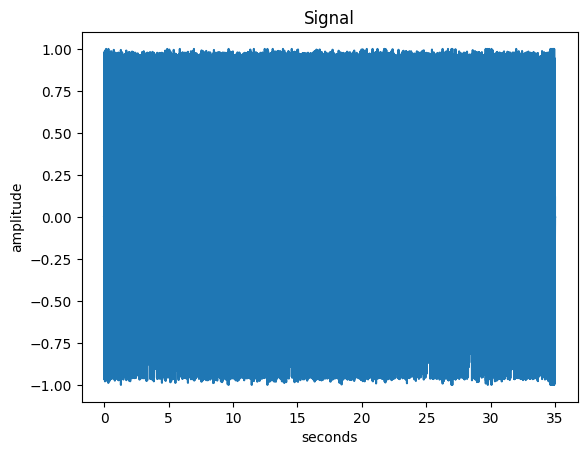

In [46]:
plt.title('Signal')
plt.plot(time,audio_35 )
plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.show()


Above is a waveform for the signal. Next, we can use the `pad_or_trim()` method to ensure the sample is in the right form for inference. In our case the file is 35 seconds, so it gets trimmed to fit the 30 seconds part (30 seconds parts get fed into the encoder).


In [47]:
audio = whisper.pad_or_trim(audio_35)

We can plot the amplitude of signal over time with trimmed/padded audio:


In [48]:
n_samples=audio.shape[-1]
time=np.linspace(0,(n_samples-1)*delta,n_samples)

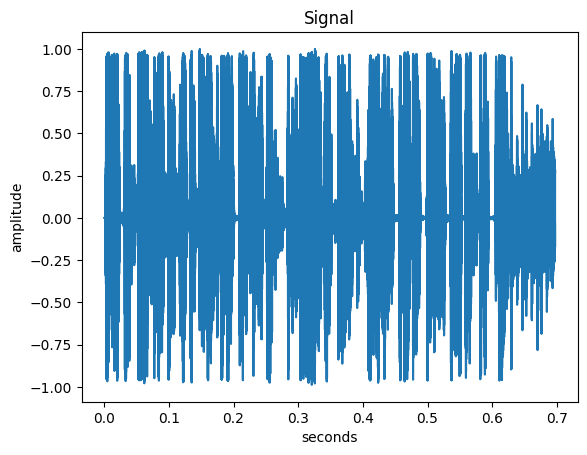

In [49]:
plt.plot(time,audio)

plt.ylabel('amplitude')
plt.xlabel('seconds')
plt.title('Signal')
plt.show()

In [50]:
mel = whisper.log_mel_spectrogram(audio).to(model_m.device)

The output above is a tensor of converted frequencies. Now, we plot 2 subplots, one is a regular representation of sound amplitude over period of time, and the other is our mel spectrogram:


Text(42.722222222222214, 0.5, 'Mel Scale')

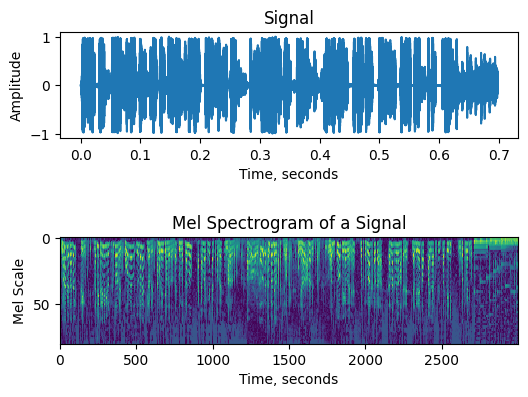

In [51]:
fig, (ax1, ax2) = plt.subplots(2)
fig.tight_layout(pad=5.0)
ax1.plot(time,audio)
ax1.set_title('Signal')
ax1.set_xlabel('Time, seconds')
ax1.set_ylabel('Amplitude')
ax2.imshow((mel.numpy()*mel.numpy())**(1/2),interpolation='nearest', aspect='auto')
ax2.set_title('Mel Spectrogram of a Signal')
ax2.set_xlabel('Time, seconds')
ax2.set_ylabel('Mel Scale')

## Language Detection
In this Example, we will listen to our audio file and detect the spoken language.


The sample rate (sr) by default is 22050, which means that for every second there are 22,050 samples. We can use `ipd.Audio()` function to listen to our audio file:


In [52]:
sr=22050
ipd.Audio(audio, rate=sr)

We can find the probability of each language by using `detect_language()` method:


In [53]:
_, probs = model_m.detect_language(mel)


We also can print the top ten languages' prefixes and their probabilities:


In [ ]:
print([item  for item in  probs.items()][0:10])
for item in probs.items():
    if item[0] == 'kn':
        print(item[1])
        break

[('fo', 1.3269452665554127e-06), ('nl', 9.452307131141424e-05), ('ka', 1.0628035118642742e-09), ('uk', 1.79825610757689e-06), ('sa', 0.0016755765536800027), ('de', 7.89213754615048e-06), ('ar', 5.554573726840317e-05), ('el', 1.9228980363550363e-07), ('it', 9.145445801550522e-05), ('id', 2.837298893609841e-07)]
0.001269100233912468


Finally, we can detect the spoken language by selecting the key with the highest probability value:


In [55]:
print(f"Detected language: {max(probs, key=probs.get)}")

Detected language: kn


Therefore, the spoken language is English, with 99.97% probability.


## Decoding and Transcription

The difference between decoding and transcription is that the decode function processes only 30 seconds of audio segment. Transcribe function will decode the entire audio file. Below, we decode 30-seconds audio segment(s) using `whisper.decode()` function.


In [56]:
options = whisper.DecodingOptions(fp16 = False)
result = whisper.decode(model_m, mel, options)

We print the recognized text using the attribute text :


In [57]:
print(result.text)

ಮನಾಭಿಸಾಯದಲಿ ಸ್ಗಂದಕ್ಷಿ ಅತಿ ಕಡಿಮಾನಿನಿರಿತಾಗಾದರ ಬಲ್ಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿಲಿ


The output of the above is a text that fits into 30 seconds audio segment. Now, the `transcribe()` method reads the entire file and processes the audio with a sliding 30-second window, performing autoregressive sequence-to-sequence predictions on each window.


In [ ]:
transcription = model_m.transcribe(file_path, fp16 = False)["text"]

In [ ]:
transcription

' Question number five. Machine learning technologies are constantly evolving and advancing. Does this affect me day to day and what do I do to stay informed? Subscribing to popular data science portals like Towards Data Science, Analytics, Vidya helps to stay up to date in this dynamic field and also sharing my own projects and receiving some feedback from the public expands my data science knowledge.'

## Translation

In this Example, we translate our audio file to French, by setting `language='fr'`. You can also use any other language available [here](https://github.com/openai/whisper).


In [ ]:
translation = model_m.transcribe(file_path, language='en', fp16 = False)["text"]

In [ ]:
translation

' Question number five. Machine learning technologies are constantly evolving and advancing. Does this affect me day to day and what do I do to stay informed? Subscribing to popular data science portals like Towards Data Science, Analytics, Vidya helps to stay up to date in this dynamic field and also sharing my own projects and receiving some feedback from the public expands my data science knowledge.'

We will convert and download an 'MP4' file using `streams.get_audio_only()` and `download()` functions.
